In [5]:
#Temp

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar os dados da planilha Excel
df = pd.read_excel("D:/Dados/Fintech/Modelo FinTech.xlsx")

# Separar os dados em features (X) e target (y)
X = df.drop('Valor', axis=1)
y = df['Categoria']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir a arquitetura da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Fazer previsões
predictions = model.predict(X_test_scaled)


FileNotFoundError: [Errno 2] No such file or directory: 'D:/Dados/Fintech/Modelo FinTech.xlsx'

In [4]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Carregar dados do Excel
dados = pd.read_excel("D:/Dados/Fintech/Modelo FinTech.xlsx")

# Pré-processamento dos dados
# ... (limpar, normalizar, etc.)

# Dividir em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_pre_processados, labels, test_size=0.2)

# Criar o modelo de rede neural
modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_dim=X_treino.shape[1]))
modelo.add(Dense(32, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinar o modelo
modelo.fit(X_treino, y_treino, epochs=10000, batch_size=32)

# Avaliar o modelo
resultado = modelo.evaluate(X_teste, y_teste)
print('Precisão:', resultado[1])

# Fazer previsões em novos dados
novo_cliente = # ... (dados do novo cliente)
previsao = modelo.predict(novo_cliente.reshape(1, -1))
if previsao > 0.5:
    print('Previsão: Compra provável')
else:
    print('Previsão: Compra improvável')


SyntaxError: invalid syntax (1815502499.py, line 31)

 
 Inicio 2024-08-01 14:35:24.660865
Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


c:\Users\elton\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


c:\Users\elton\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 121s 895ms/step - accuracy: 0.5231 - loss: 0.9692
Epoch 2/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 487ms/step - accuracy: 0.6431 - loss: 0.6421
Epoch 3/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 59s 466ms/step - accuracy: 0.6686 - loss: 0.6106
Epoch 4/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 485ms/step - accuracy: 0.7121 - loss: 0.5685
Epoch 5/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 67s 519ms/step - accuracy: 0.7140 - loss: 0.5662
Epoch 6/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 622ms/step - accuracy: 0.7031 - loss: 0.5673
Epoch 7/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 70s 551ms/step - accuracy: 0.7298 - loss: 0.5246
Epoch 8/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 534ms/step - accuracy: 0.7496 - loss: 0.4958
Epoch 9/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 64s 501ms/step - accuracy: 0.7779 - loss: 0.4613
Epoch 10/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 69s 542ms/step - accuracy: 0.7828 - loss: 0.4474
Epoch 11/1000
125/125 ━━━━━━━━━━━━━━━━━━━━ 87s 684ms/step - accuracy: 0.7857 - loss: 0.4485
Epoch 12/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3137)           │     9,843,906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         6,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,538,727 (112.68 MB)

 Trainable params: 29,538,727 (112.68 MB)

 Non-trainable params: 0 (0.00 B)

Arquivo escolhido aleatoriamente: E:/Dados/caes-e-gatos/teste/cao/dog.3731.jpg


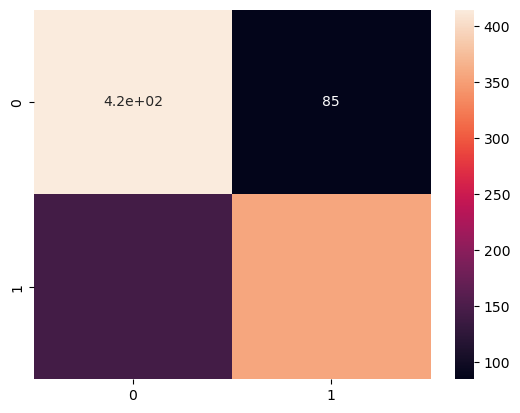

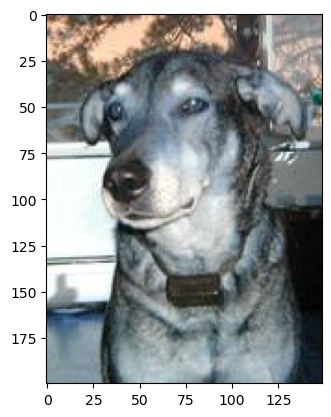

0
Cão

 Fim 2024-08-02 04:55:33.111896

 Tempo 14:20:08.451031


In [1]:
# Exercicio 64 
#Classificador de Imagens caes e gatos 

#Importando as bibliotecas 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow
tf.__version__
import os
import random
from PIL import Image

#Calcular Tempo 
import datetime
data_hora_atual_ini = datetime.datetime.now()
print(" \n Inicio",data_hora_atual_ini)

def escolher_arquivo_aleatorio(caminho_da_pasta):
    # Lista todos os arquivos na pasta
    arquivos = os.listdir(caminho_da_pasta)
    
    # Filtra apenas os arquivos (remove pastas)
    arquivos = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(caminho_da_pasta, arquivo))]
    
    # Escolhe um arquivo aleatoriamente
    arquivo_aleatorio = random.choice(arquivos)
    
    # Retorna o caminho completo do arquivo escolhido
    return os.path.join(caminho_da_pasta, arquivo_aleatorio)

# Exemplo de uso
import os
import random
from PIL import Image

def escolher_arquivo_aleatorio(caminho_da_pasta):
    # Lista todos os arquivos na pasta
    arquivos = os.listdir(caminho_da_pasta)
    
    # Filtra apenas os arquivos (remove pastas)
    arquivos = [arquivo for arquivo in arquivos if os.path.isfile(os.path.join(caminho_da_pasta, arquivo))]
    
    # Escolhe um arquivo aleatoriamente
    arquivo_aleatorio = random.choice(arquivos)
    
    # Retorna o caminho completo do arquivo escolhido
    return os.path.join(caminho_da_pasta, arquivo_aleatorio)


# Funcao Gerar numero
def num_aleat(num_min,num_max):
    import random
    num_ger = random.randrange(num_min,num_max)
    return num_ger




# Conexão do Google Colava à pasta do Google Drive, local onde deverá ter salvo a pasta caes-e-gatos.zip
#from google.colab import drive
#drive.mount('/content/drive')
# Descompactar a pasta caes-e-gatos na pasta de Arquivos do Google Colab
#path = '/content/drive/MyDrive/caes-e-gatos.zip'
#zip_object = zipfile.ZipFile(file=path, mode='r')
#zip_object.extractall('./')
#zip_object.close()

#Carregamento das imagens
# Localizar o caminho da primeira imagem de gato na pasta treinamento
cat_arq_ini = 'E:/Dados/caes-e-gatos/treinamento/gato/cat.0.jpg'
tf.keras.preprocessing.image.load_img(cat_arq_ini)

# Localizar o caminho da primeira imagem de cão na pasta treinamento
dog_arq_ini = 'E:/Dados/caes-e-gatos/treinamento/cao/dog.0.jpg'
tf.keras.preprocessing.image.load_img(dog_arq_ini)

#Base de treinamento e teste
# Localizar as 4000 imagens, nas duas classes para a base de treinamento
dir_train = 'E:/Dados/caes-e-gatos/treinamento/'
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
dataset_treinamento = gerador_treinamento.flow_from_directory(dir_train,
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical',
                                                        shuffle = True)



# Estabelecendo índices para as classes no treinamento 0: cão e 1: gato
dataset_treinamento.class_indices                                                        

# Localizar o campinho para a paste de teste, contendo 1000 imagens com as duas classes
dir_test = 'E:/Dados/caes-e-gatos/teste/'
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory(dir_test,
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)


#Construção e treinamento da rede neural
# Criando cada camada da rede neural, conforme o modelo sequencial da rede neural convolucional
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

# Visualizando o modelo com as classes criadas
network.summary()

# Estabelecendo as taxas de perda e acurácia para o modelo
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

# Treinando o modelo com 10 épocas de treinamento
# OBSERVAÇÃO: esta execução pode demorar conforme o desempenho de sua máquina
historico = network.fit(dataset_treinamento, epochs=1000)

# Avaliação da rede neural
# Estabelecendo índices para as classes no teste 0: cão e 1: gato
dataset_teste.class_indices

# Trazendo ao modelo as predições do treinamento
previsoes = network.predict(dataset_teste)

# Verificando a máxima previsão para as classes
previsoes = np.argmax(previsoes, axis = 1)

# Verificando os dados do modelo treinado
dataset_teste.classes

# Demonstrando a acurácia do modelo treinado
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

#OBSERVAÇÃO: o valor demonstrado acima é a precisão do treinamento do modelo. Valores quanto mais próximos de 1, mais precisa será a classificação. Para aumentar a precisão, pode-se retreinar o modelo ou ainda inserir mais imagens para o treinamento

# Atribuindo as classes ao modelo treinado
dataset_teste.class_indices

# Estabelecendo a matriz de confusão para confronto do dados entre as classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)

# Demonstrando a matriz de confusão
sns.heatmap(cm, annot=True);

# Classificando os dados obtidos
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

# Salvar e carregar a rede neural
# Gerando um arquivo .json com os dados do modelo
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

  # Criando o arquivo de pesos (pesos.hdf5) do treinamento
dir_salv_pesos_keras = 'E:/Dados/caes-e-gatos/pesos.keras'
from keras.models import save_model
network_saved = save_model(network, dir_salv_pesos_keras)

# Visualizando os dados salvos no arquivo .json
dir_salv_json = 'E:/Dados/caes-e-gatos/network.json'
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

# Atribuindo o treinamento ao modelo
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights(dir_salv_pesos_keras)
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Visualizando o modelo de rede neural
network_loaded.summary()



# Gera um numero aleatorio de 1 a 4 para os diretorios 
# Por funcao retorma o numero o numero aleatorio
num_ger = num_aleat(1,4)

if num_ger == 1:
    caminho_da_pasta = 'E:/Dados/caes-e-gatos/teste/cao/'
elif num_ger == 2:
    caminho_da_pasta = 'E:/Dados/caes-e-gatos/teste/gato/'
elif num_ger == 3:
    caminho_da_pasta = 'E:/Dados/caes-e-gatos/treinamento/cao/'
elif num_ger == 4:
    caminho_da_pasta = 'E:/Dados/caes-e-gatos/treinamento/gato/'

# Apos diretorio aleatorio, escolhe arquivo aleatorio para analise
# Assim é possivel juntar mais de um diretório
arquivo_aleatorio = escolher_arquivo_aleatorio(caminho_da_pasta)
print("Arquivo escolhido aleatoriamente:", arquivo_aleatorio)




# Classificação de uma única imagem
# Na pasta teste, localize qualquer imagem para a classificação, conforme o modelo treinado
# Abre o arquivo de imagem
dir_arq_analise  = arquivo_aleatorio
imagem = cv2.imread(arquivo_aleatorio)
#imagem = Image.open(arquivo_aleatorio)
   
# Exibe a imagem
plt.show()
plt.imshow(imagem)
#imagem.show()
#imagem = cv2.imread('/content/caes-e-gatos/teste/cao/dog.3501.jpg')


# Redimensionando a imagem em 64x64 pixels
imagem = cv2.resize(imagem, (64, 64))
#cv2_imshow(imagem)
plt.show()

# Convertendo em escala de cinza
imagem = imagem / 255

# Parâmetros da imagem redimensionada
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

resultado = network_loaded(imagem)
resultado

# Demonstrando a classe que obteve o maior resultado
resultado = np.argmax(resultado)
resultado
print(resultado)

# Verificando as classes do modelo
dataset_teste.class_indices
print(dataset_teste)

# Categorizando o resultado
if resultado == 0:
  print('Cão')
else:
  print('Gato')

  #Calcular Tempo 
data_hora_atual_fim = datetime.datetime.now()
print("\n Fim",data_hora_atual_fim)
tempo = data_hora_atual_fim - data_hora_atual_ini
print('\n Tempo',tempo)

In [28]:
def cifra_de_cesar_modificada(texto, deslocamento):
    resultado = ''
    deslocamento_atual = deslocamento
    for char in texto:
        if char.isalpha():
            if char.islower():
                novo_char = chr(((ord(char) - ord('a') + deslocamento_atual) % 26) + ord('a'))
            else:
                novo_char = chr(((ord(char) - ord('A') + deslocamento_atual) % 26) + ord('A'))
            resultado += novo_char
            deslocamento_atual += 1
        else:
            resultado += char
    return resultado

# Exemplo de uso:
texto = "A"
deslocamento = 3
texto_cifrado = cifra_de_cesar_modificada(texto, deslocamento)
print("Texto cifrado:", texto_cifrado)

Texto cifrado: D


In [46]:
def cifra_cesar_modificada (texto,deslocamento):
	resultado = ''
	for char in texto:
		if char.isalpha():
			shift = ord(char) + deslocamento
			if char.islower():
				resultado += chr((shift - 97) % 26 + 97)
			else:
				resultado += chr((shift -65) % 26 + 65)
			deslocamento +=1
		else:
			resultado += char
	return resultado

texto = 'AaBbCc1234567'
deslocamento = 1
resultado = cifra_cesar_modificada(texto,deslocamento)
print(resultado)

BcEfHi1234567


In [2]:
def verifica_numeros (num1,num2):
		if num1 > num2 and (num1 % num2) == 0:
			return "O primeiro numero é > e / pelo segundo"
		elif num1 > num2:
			return "O primeio numero é > que o segundo mas não é /"
		else:
		    return "O primeiro numero não é > que o segundo"
		

num1 = 10
num2 = 9
result = verifica_numeros(num1,num2)
print(result)

O primeio numero é > que o segundo mas não é /


In [3]:
vendas = [[120, 90, 140], [80, 110, 90], [130, 100, 140]]

categorias = {0: 'Eletrônicos', 1: 'Vestuário', 2: 'Brinquedos'}

for i, dia in enumerate(vendas):

    for j, categoria in enumerate(dia):

        if categoria > 100:

            print(f"Dia {i+1}, Categoria {categorias[j]}: {categoria}")

Dia 1, Categoria Eletrônicos: 120
Dia 1, Categoria Brinquedos: 140
Dia 2, Categoria Vestuário: 110
Dia 3, Categoria Eletrônicos: 130
Dia 3, Categoria Brinquedos: 140


In [6]:
mensagens = ["Olá", "Novidades", "", "Promoção"]

i = 0

while i < len(mensagens):

    if not mensagens[i]:

        break

    i += 1

print(i)

2


In [65]:
import itertools
def gerar_anagramas_validos(palavra,lista_palavras_validas):
	anagramas = set(itertools.permutations(palavra))
	return filter(lambda : x in lista_palavras_validas, map [''.join, anagramas])

print (gerar_anagramas_validos)



<function gerar_anagramas_validos at 0x00000230168536A0>


In [66]:
import itertools
def gerar_anagramas_validos(palavra,lista_palavras_validas):
	anagramas = set(itertools,permutations(palavra))
	return filter(lambia x: x in lista_palavras_validas, map(''.join, anagramas))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2051928085.py, line 4)

In [1]:
# Constantes para limites de saldo e transações
SALDO_ALTO_RISCO = 1000
SALDO_MODERADO_RISCO = 5000
TRANSACOES_SUSPEITAS_ALTO_RISCO = 2

def classificar_risco_saldo(saldo):
    """Classifica o risco com base no saldo da conta."""
    if saldo < SALDO_ALTO_RISCO:
        return "Alto"
    elif saldo <= SALDO_MODERADO_RISCO:
        return "Moderado"
    else:
        return "Baixo"

def classificar_risco_transacoes(transacoes_suspeitas):
    """Classifica o risco com base no número de transações suspeitas."""
    if transacoes_suspeitas > TRANSACOES_SUSPEITAS_ALTO_RISCO:
        return "Alto"
    elif transacoes_suspeitas >= 1:
        return "Moderado"
    else:
        return "Baixo"

def ajustar_risco_por_tempo(risco, tempo_conta):
    """Ajusta o nível de risco com base no tempo de abertura da conta."""
    if tempo_conta < 1:
        return "Alto" if risco != "Alto" else risco
    elif tempo_conta > 5:
        return "Baixo" if risco == "Moderado" else risco
    else:
        return risco

def classificar_risco(saldo, transacoes_suspeitas, tempo_conta):
    risco_saldo = classificar_risco_saldo(saldo)
    risco_transacoes = classificar_risco_transacoes(transacoes_suspeitas)

    # Correção: Utilizar um dicionário para mapear os níveis de risco para um valor que possa ser comparado
    ordem_risco = {"Baixo": 0, "Moderado": 1, "Alto": 2}
    risco_final = "Alto" if risco_saldo == "Alto" or risco_transacoes == "Alto" else max(risco_saldo, risco_transacoes, key=ordem_risco.get)

    risco_ajustado = ajustar_risco_por_tempo(risco_final, tempo_conta)

    return risco_ajustado

# Dados da conta
saldo = 1500
transacoes_suspeitas = 1
tempo_conta = 3  # em anos

# Classificação de risco
risco_conta = classificar_risco(saldo, transacoes_suspeitas, tempo_conta)
print(f"Classificação de risco da conta: {risco_conta}")


Classificação de risco da conta: Moderado


In [2]:
import tkinter as tk
import random

class BatalhaNaval:
    def __init__(self, root):
        self.root = root
        self.root.title("Batalha Naval")

        self.tamanho_tabuleiro = 5
        self.navios = 3
        self.tabuleiro = [['O' for _ in range(self.tamanho_tabuleiro)] for _ in range(self.tamanho_tabuleiro)]
        self.colocar_navios()

        self.botao_tabuleiro = [[None for _ in range(self.tamanho_tabuleiro)] for _ in range(self.tamanho_tabuleiro)]
        self.criar_interface()

    def colocar_navios(self):
        count = 0
        while count < self.navios:
            x, y = random.randint(0, self.tamanho_tabuleiro-1), random.randint(0, self.tamanho_tabuleiro-1)
            if self.tabuleiro[x][y] == 'O':
                self.tabuleiro[x][y] = 'N'
                count += 1

    def criar_interface(self):
        for i in range(self.tamanho_tabuleiro):
            for j in range(self.tamanho_tabuleiro):
                self.botao_tabuleiro[i][j] = tk.Button(self.root, text=' ', width=6, height=3,
                                                       command=lambda x=i, y=j: self.atirar(x, y))
                self.botao_tabuleiro[i][j].grid(row=i, column=j)

    def atirar(self, x, y):
        if self.tabuleiro[x][y] == 'N':
            self.botao_tabuleiro[x][y].config(text='X', bg='red')
            self.tabuleiro[x][y] = 'X'
        else:
            self.botao_tabuleiro[x][y].config(text='-', bg='blue')
            self.tabuleiro[x][y] = '-'
        self.botao_tabuleiro[x][y].config(state='disabled')
        self.verificar_vitoria()

    def verificar_vitoria(self):
        for linha in self.tabuleiro:
            if 'N' in linha:
                return
        tk.messagebox.showinfo("Batalha Naval", "Você venceu!")

if __name__ == "__main__":
    root = tk.Tk()
    app = BatalhaNaval(root)
    root.mainloop()



Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\elton\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\elton\AppData\Local\Temp\ipykernel_6588\3199135199.py", line 29, in <lambda>
    command=lambda x=i, y=j: self.atirar(x, y))
                             ^^^^^^^^^^^^^^^^^
  File "C:\Users\elton\AppData\Local\Temp\ipykernel_6588\3199135199.py", line 40, in atirar
    self.verificar_vitoria()
  File "C:\Users\elton\AppData\Local\Temp\ipykernel_6588\3199135199.py", line 46, in verificar_vitoria
    tk.messagebox.showinfo("Batalha Naval", "Você venceu!")
    ^^^^^^^^^^^^^
AttributeError: module 'tkinter' has no attribute 'messagebox'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\elton\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\elton\AppData\Local\Tem

In [9]:
# 1. Remover duplicatas
file_path = "D:\Dados\Fintech\FinTech.xlsx"
transactions_df = pd.read_excel(file_path, sheet_name='Transações')
transactions_df = transactions_df.drop_duplicates()

# 2. Tratar valores ausentes (preenchendo com valores padrão ou removendo)
transactions_df = transactions_df.fillna({
    'Descrição': 'Desconhecido',
    'Valor': 0,
    'Categoria': 'Desconhecido',
    'Conta': 'Desconhecido',
    'Categoria Master': 'Desconhecido'
})

# 3. Padronizar formatação de datas e valores
transactions_df['Data Ocorrência'] = pd.to_datetime(transactions_df['Data Ocorrência'])
transactions_df['Valor'] = transactions_df['Valor'].astype(float)

# 4. Remover espaços em branco desnecessários
transactions_df['Descrição'] = transactions_df['Descrição'].str.strip()
transactions_df['Categoria'] = transactions_df['Categoria'].str.strip()
transactions_df['Conta'] = transactions_df['Conta'].str.strip()
transactions_df['Categoria Master'] = transactions_df['Categoria Master'].str.strip()

# Verificando o resultado da limpeza
transactions_df.head()






import pandas as pd

# Carregar o arquivo Excel
file_path = "D:\Dados\Fintech\FinTech.xlsx"
transactions_df = pd.read_excel(file_path, sheet_name='Transações')

# 1. Remover duplicatas
transactions_df = transactions_df.drop_duplicates()

# 2. Tratar valores ausentes (preenchendo com valores padrão ou removendo)
transactions_df = transactions_df.fillna({
    'Descrição': 'Desconhecido',
    'Valor': 0,
    'Categoria': 'Desconhecido',
    'Conta': 'Desconhecido',
    'Categoria Master': 'Desconhecido'
})

# 3. Padronizar formatação de datas e valores
transactions_df['Data Ocorrência'] = pd.to_datetime(transactions_df['Data Ocorrência'])
transactions_df['Valor'] = transactions_df['Valor'].astype(float)

# 4. Remover espaços em branco desnecessários
transactions_df['Descrição'] = transactions_df['Descrição'].str.strip()
transactions_df['Categoria'] = transactions_df['Categoria'].str.strip()
transactions_df['Conta'] = transactions_df['Conta'].str.strip()
transactions_df['Categoria Master'] = transactions_df['Categoria Master'].str.strip()

# Exibir o resultado da limpeza
transactions_df.head()

# Resumo estatístico dos dados numéricos
summary_statistics = transactions_df.describe()
summary_statistics

# Agrupar por 'Categoria' e calcular a soma dos 'Valores'
grouped_by_category = transactions_df.groupby('Categoria')['Valor'].sum().reset_index()
grouped_by_category


# Adicionar uma coluna para o mês
transactions_df['Mês'] = transactions_df['Data Ocorrência'].dt.to_period('M')

# Criar uma tabela dinâmica
pivot_table = transactions_df.pivot_table(
    values='Valor', 
    index='Mês', 
    columns='Categoria', 
    aggfunc='sum', 
    fill_value=0
)
pivot_table


import pandas as pd

# Carregar o arquivo Excel
file_path = "D:\Dados\Fintech\FinTech.xlsx"
transactions_df = pd.read_excel(file_path, sheet_name='Transações')

# Resumo estatístico dos dados numéricos
summary_statistics = transactions_df.describe()
print(summary_statistics)


# Agrupar por 'Categoria' e calcular a soma dos 'Valores'
grouped_by_category = transactions_df.groupby('Categoria')['Valor'].sum().reset_index()
print(grouped_by_category)


# Adicionar uma coluna para o mês
transactions_df['Mês'] = transactions_df['Data Ocorrência'].dt.to_period('M')

# Criar uma tabela dinâmica com a soma dos valores por categoria e mês
pivot_table = transactions_df.pivot_table(
    values='Valor', 
    index='Mês', 
    columns='Categoria', 
    aggfunc='sum', 
    fill_value=0
)
print(pivot_table)





                     Data Ocorrência         Valor
count                           5640   5640.000000
mean   2022-12-10 07:49:16.595744768     -1.860330
min              2021-01-06 12:00:00  -9570.000000
25%              2022-01-15 12:00:00   -102.650000
50%              2022-12-15 12:00:00    -50.000000
75%              2023-10-06 12:00:00    -20.000000
max              2025-12-29 12:00:00  26000.000000
std                              NaN    907.713559
                Categoria     Valor
0                Academia  -3311.60
1              Acessórios   -589.79
2                  Almoço  -1712.45
3         Anuidade Cartão   -387.15
4                 Açougue   -461.78
..                    ...       ...
58                   Táxi  -1833.12
59  Utensílios Domésticos -13488.91
60            Veterinário  -2306.53
61                Viagens  -5022.23
62                   Água  -2774.20

[63 rows x 2 columns]
Categoria  Academia  Acessórios  Almoço  Anuidade Cartão  Açougue  Bar/Balada  \
Mês  